In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/machine_learning_projects/salary_prediction/data/processed/X_train.csv')

In [ ]:
y_train = X_train['SALARY']
X_train.drop(columns =['SALARY'],inplace = True)
X_train.loc[:, "SALARY"] = list(y_train)

#zero var --> to ckech if there is ay features that have one value or one category

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold = 0)
var_thresh.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
var_thresh.get_feature_names_out()

array(['SEX', 'DESIGNATION', 'AGE', 'LEAVES USED', 'LEAVES REMAINING',
       'RATINGS', 'PAST EXP', 'nb_months', 'yearsMonths', 'UNIT_Finance',
       'UNIT_IT', 'UNIT_Management', 'UNIT_Marketing', 'UNIT_Operations',
       'UNIT_Web', 'nb_months_log', 'yearsMonths_log', 'PAST EXP grouped',
       'LEAVES REMAINING Z', 'LEAVES USED Z', 'DESIGNATION M', 'SALARY'],
      dtype=object)

In [ ]:
var = pd.Series(var_thresh.get_support() )
var.index = var_thresh.get_feature_names_out()
var

SEX                   True
DESIGNATION           True
AGE                   True
LEAVES USED           True
LEAVES REMAINING      True
RATINGS               True
PAST EXP              True
nb_months             True
yearsMonths           True
UNIT_Finance          True
UNIT_IT               True
UNIT_Management       True
UNIT_Marketing        True
UNIT_Operations       True
UNIT_Web              True
nb_months_log         True
yearsMonths_log       True
PAST EXP grouped      True
LEAVES REMAINING Z    True
LEAVES USED Z         True
DESIGNATION M         True
SALARY                True
dtype: bool

In [ ]:
print('there are', X_train.shape[1] - len(var_thresh.get_feature_names_out()),'features with zero variance')

there are 0 features with zero variance


#pearson's correlation  

In [ ]:
cor = X_train.corr()

In [ ]:
cor

,SEX,DESIGNATION,AGE,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,nb_months,yearsMonths,UNIT_Finance,...,UNIT_Marketing,UNIT_Operations,UNIT_Web,nb_months_log,yearsMonths_log,PAST EXP grouped,LEAVES REMAINING Z,LEAVES USED Z,DESIGNATION M,SALARY
SEX,1.000000,-0.009371,-0.007314,-0.011043,0.011043,0.036286,0.001866,-0.001695,-0.001695,0.020329,...,0.001426,0.004082,0.014523,0.011621,0.011621,0.005783,0.011043,-0.011043,-0.015147,-0.001569
DESIGNATION,-0.009371,1.000000,0.803132,0.012496,-0.012496,0.007032,0.684882,0.497979,0.497979,0.015013,...,0.033211,-0.035219,-0.016123,0.391359,0.391359,0.648657,-0.012496,0.012496,0.976732,0.975472
AGE,-0.007314,0.803132,1.000000,-0.001389,0.001389,0.016499,0.823745,0.420147,0.420147,0.018131,...,0.024679,-0.031747,-0.007283,0.338721,0.338721,0.809871,0.001389,-0.001389,0.840837,0.766283
LEAVES USED,-0.011043,0.012496,-0.001389,1.000000,-1.000000,0.001001,0.003865,0.013788,0.013788,0.003402,...,-0.019719,0.054418,0.008443,0.016113,0.016113,0.007918,-1.000000,1.000000,0.016282,0.006547
LEAVES REMAINING,0.011043,-0.012496,0.001389,-1.000000,1.000000,-0.001001,-0.003865,-0.013788,-0.013788,-0.003402,...,0.019719,-0.054418,-0.008443,-0.016113,-0.016113,-0.007918,1.000000,-1.000000,-0.016282,-0.006547
RATINGS,0.036286,0.007032,0.016499,0.001001,-0.001001,1.000000,0.031787,0.015614,0.015614,-0.012302,...,-0.015605,0.016339,-0.011359,0.015896,0.015896,0.027649,-0.001001,0.001001,0.001590,0.003455
PAST EXP,0.001866,0.684882,0.823745,0.003865,-0.003865,0.031787,1.000000,0.139338,0.139338,0.028069,...,0.013738,-0.030311,-0.006980,0.045471,0.045471,0.940943,-0.003865,0.003865,0.699322,0.665801
nb_months,-0.001695,0.497979,0.420147,0.013788,-0.013788,0.015614,0.139338,1.000000,1.000000,0.018327,...,0.032035,-0.032465,0.003305,0.965223,0.965223,0.142129,-0.013788,0.013788,0.501979,0.482405
yearsMonths,-0.001695,0.497979,0.420147,0.013788,-0.013788,0.015614,0.139338,1.000000,1.000000,0.018327,...,0.032035,-0.032465,0.003305,0.965223,0.965223,0.142129,-0.013788,0.013788,0.501979,0.482405
UNIT_Finance,0.020329,0.015013,0.018131,0.003402,-0.003402,-0.012302,0.028069,0.018327,0.018327,1.000000,...,-0.195109,-0.207070,-0.198759,0.018853,0.018853,0.019093,-0.003402,0.003402,0.024117,0.013834


<Axes: >

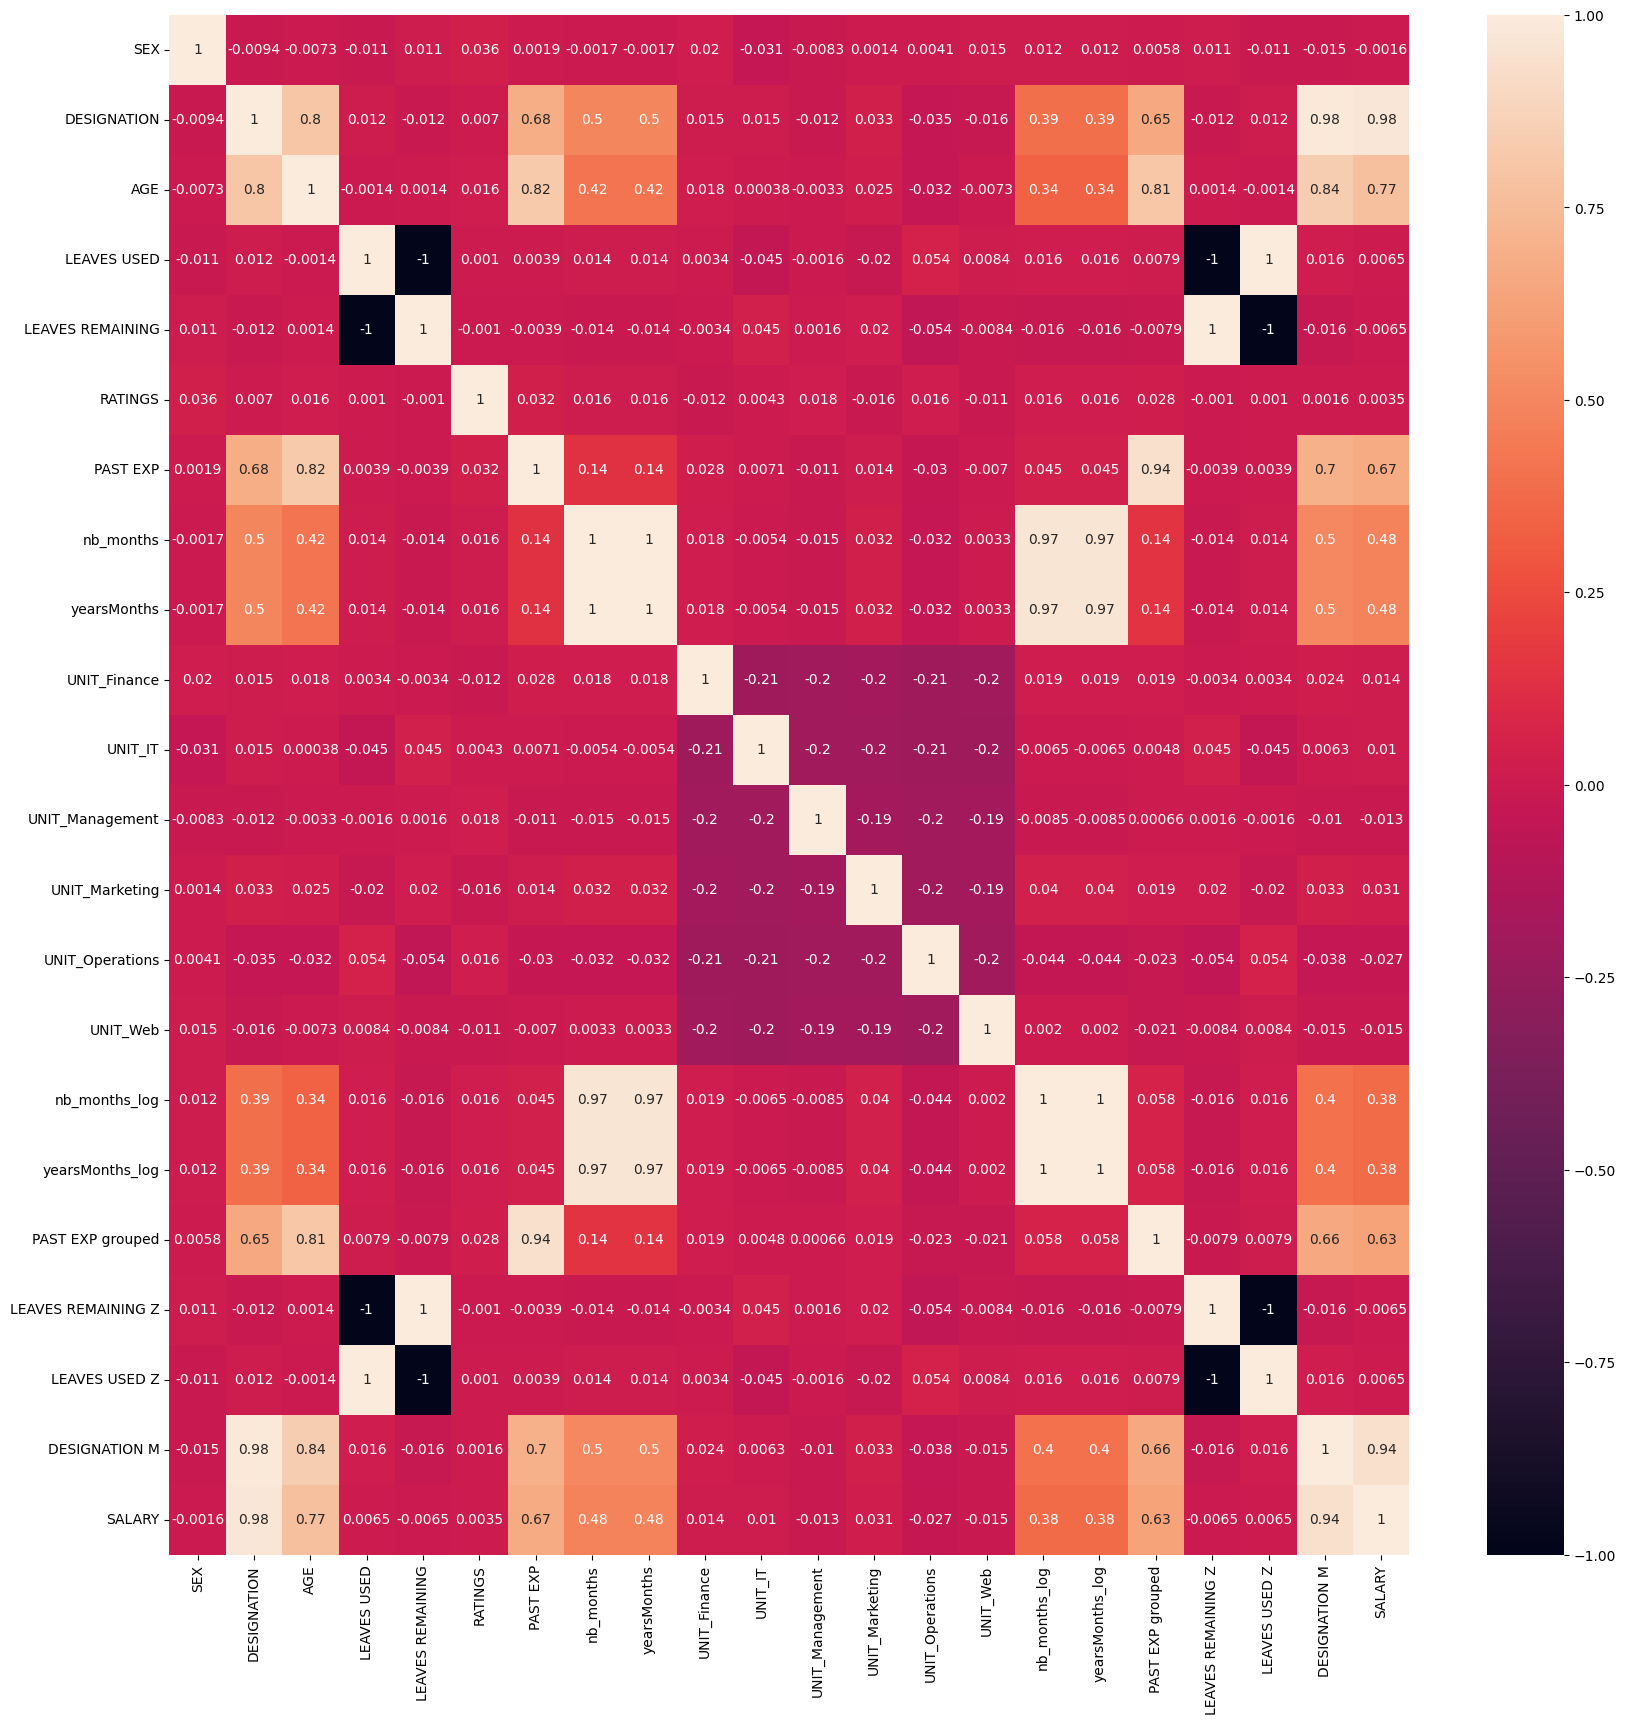

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot = True)

<Axes: >

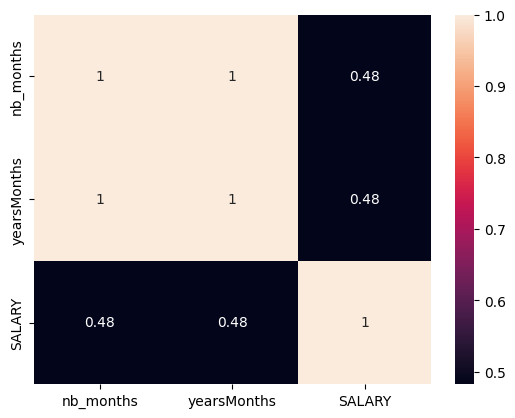

In [ ]:
sns.heatmap(X_train[['nb_months','yearsMonths','SALARY']].corr(), annot = True)

drop nb_months

<Axes: >

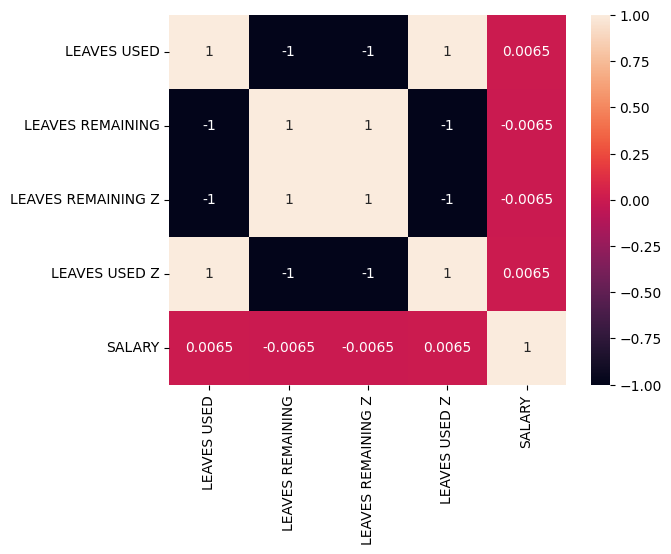

In [ ]:
sns.heatmap(X_train[['LEAVES USED','LEAVES REMAINING','LEAVES REMAINING Z','LEAVES USED Z','SALARY']].corr(), annot = True)

drop 'LEAVES REMAINING','LEAVES REMAINING Z','LEAVES USED Z'

In [ ]:
X_train[X_train.columns[1:]].corr()['SALARY'][:].sort_values(ascending=False)

SALARY                1.000000
DESIGNATION           0.975472
DESIGNATION M         0.941313
AGE                   0.766283
PAST EXP              0.665801
PAST EXP grouped      0.631589
nb_months             0.482405
yearsMonths           0.482405
nb_months_log         0.377772
yearsMonths_log       0.377772
UNIT_Marketing        0.031132
UNIT_Finance          0.013834
UNIT_IT               0.010398
LEAVES USED           0.006547
LEAVES USED Z         0.006547
RATINGS               0.003455
LEAVES REMAINING Z   -0.006547
LEAVES REMAINING     -0.006547
UNIT_Management      -0.013355
UNIT_Web             -0.014619
UNIT_Operations      -0.026929
Name: SALARY, dtype: float64

<Axes: >

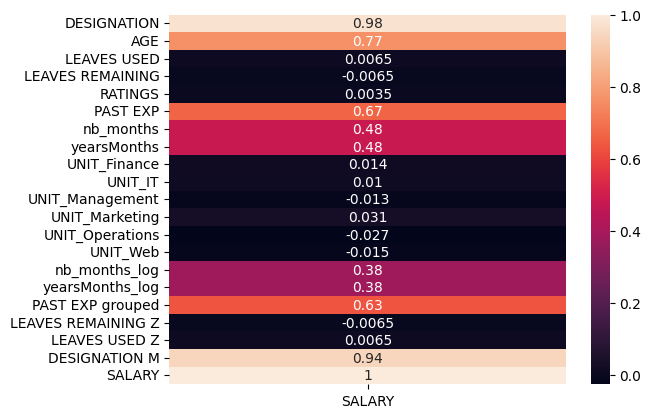

In [ ]:
sns.heatmap(pd.DataFrame(X_train[X_train.columns[1:]].corr()['SALARY'][:]), annot = True)

<Axes: >

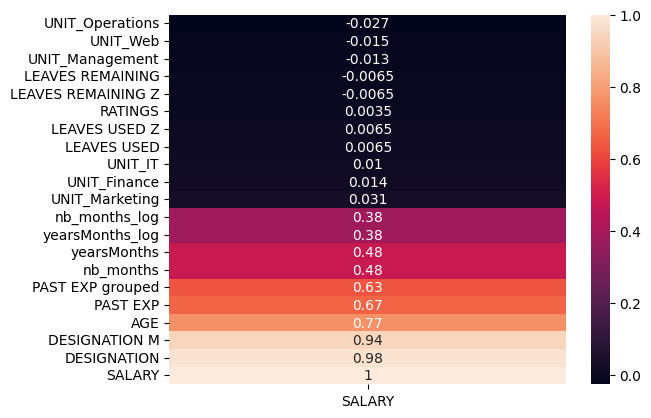

In [ ]:
sns.heatmap(pd.DataFrame(X_train[X_train.columns[1:]].corr()['SALARY'][:].sort_values()), annot = True)

#mutual information gain for reggression


In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.drop(columns=['SALARY']), y_train)
mutual_info

array([0.        , 0.90501977, 0.64924961, 0.01955195, 0.01825739,
       0.        , 0.28198464, 0.19246342, 0.19174735, 0.        ,
       0.00893437, 0.        , 0.        , 0.00165715, 0.        ,
       0.19788471, 0.1960246 , 0.27741225, 0.01885951, 0.01715207,
       0.83422976])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.drop(columns=['SALARY']).columns
mutual_info.sort_values(ascending=False)

DESIGNATION           0.905020
DESIGNATION M         0.834230
AGE                   0.649250
PAST EXP              0.281985
PAST EXP grouped      0.277412
nb_months_log         0.197885
yearsMonths_log       0.196025
nb_months             0.192463
yearsMonths           0.191747
LEAVES USED           0.019552
LEAVES REMAINING Z    0.018860
LEAVES REMAINING      0.018257
LEAVES USED Z         0.017152
UNIT_IT               0.008934
UNIT_Operations       0.001657
UNIT_Web              0.000000
UNIT_Marketing        0.000000
UNIT_Management       0.000000
UNIT_Finance          0.000000
RATINGS               0.000000
SEX                   0.000000
dtype: float64

#select features according to the results of the correlation, zero thresh, and mutual information gain

In [ ]:
selected_features = ['DESIGNATION',	'AGE','PAST EXP',	'yearsMonths','UNIT_Finance','UNIT_IT','UNIT_Management',	'UNIT_Marketing','UNIT_Operations','UNIT_Web']
target_feature = ['SALARY']

In [ ]:
y_train = X_train[target_feature]
X_train = X_train[selected_features]

In [ ]:
%mkdir /content/drive/MyDrive/machine_learning_projects/salary_prediction/data/selected

mkdir: cannot create directory ‘/content/drive/MyDrive/machine_learning_projects/salary_prediction/data/selected’: File exists


In [ ]:
path = '/content/drive/MyDrive/machine_learning_projects/salary_prediction/data/selected'

In [ ]:
X_train.to_csv(path+'/X_train.csv')
y_train.to_csv(path+'/y_train.csv')

In [ ]:
X_train

,DESIGNATION,AGE,PAST EXP,yearsMonths,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,0,3.044522,0.0,1.000000,0,0,0,0,1,0
1,0,3.178054,2.0,1.083333,0,0,0,1,0,0
2,1,3.258097,4.0,1.000000,0,0,0,0,0,1
3,0,3.218876,2.0,1.583333,0,1,0,0,0,0
4,1,3.332205,1.0,3.916667,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2006,2,3.401197,4.0,4.166667,0,1,0,0,0,0
2007,1,3.218876,0.0,1.083333,0,0,1,0,0,0
2008,0,3.135494,0.0,1.916667,0,0,0,0,0,1
2009,0,3.091042,0.0,1.750000,0,0,1,0,0,0


In [ ]:
#DESIGNATION	AGE	SALARY	PAST EXP		yearsMonths	UNIT_Finance	UNIT_IT	UNIT_Management	UNIT_Marketing	UNIT_Operations	UNIT_Web
selected_features = ['DESIGNATION',	'AGE','PAST EXP',	'yearsMonths','UNIT_Finance','UNIT_IT','UNIT_Management',	'UNIT_Marketing','UNIT_Operations','UNIT_Web']
target_feature = ['SALARY']